In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
x = wine_df.drop('quality' , axis=1)
y = wine_df['quality']

#the quality of wine 3 to 8
#if 3 4 5 = low
# if 6 7 8 = high


In [5]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
print(wine_df["quality"].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [33]:
#classify function
from sklearn.model_selection import train_test_split, cross_val_score

def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
    model.fit(x_train, y_train)

    return model.score(x_test, y_test) * 100

In [34]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lm_rl = LogisticRegression()

In [8]:
#data balcing using SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
x , y = oversample.fit_resample(x, y)

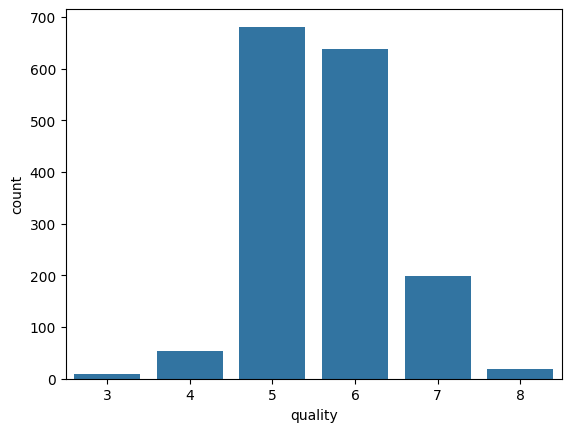

In [8]:
fig = plt.Figure(figsize=(10,6))
sns.countplot(x='quality', data=wine_df)
plt.show()

In [ ]:
#visualization the disrtribution of the all feature

sns.set(style="skyblue")
colors = sns.color_palette("pastel")

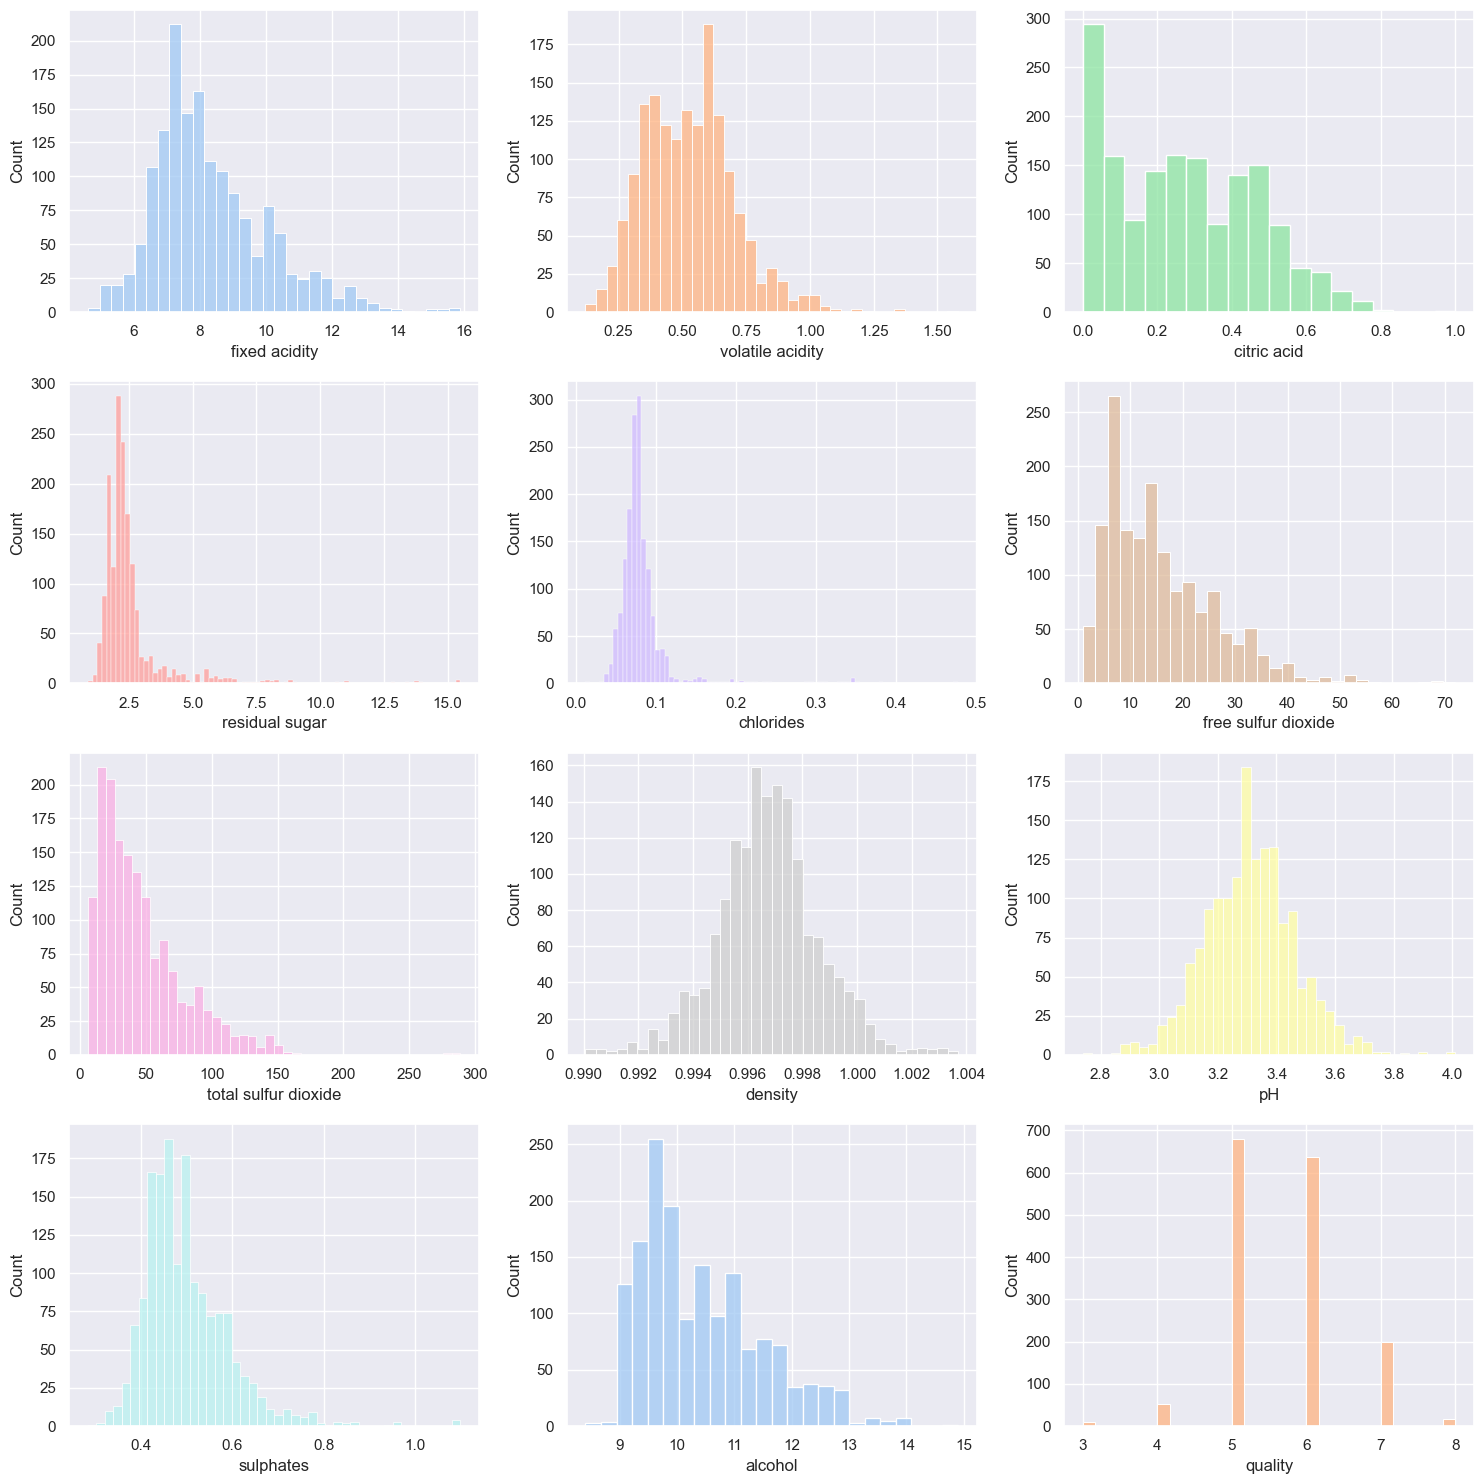

In [ ]:
#visualization the disrtribution of the all feature

.set(style="darkgrid")
columns = listsns(wine_df.columns)
colors = sns.color_palette("pastel", len(columns))

fig, ax1 = plt.subplots(4,3, figsize=(15,15))
k = 0

for i in range(4):
    for j in range(3):
        if k < len(columns):
           sns.histplot(wine_df[columns[k]], ax=ax1[i][j], color=colors[k])
        k += 1

plt.tight_layout()
plt.show()

In [21]:
def log_transform(column):
    return np.log1p(column [0])
wine_df['residual_sugar'] = wine_df[['residual sugar']].apply(log_transform, axis=1)
wine_df['chlorides'] = wine_df[['chlorides']].apply(log_transform, axis=1)
wine_df['free_sulfur_dioxide'] = wine_df[['free sulfur dioxide']].apply(log_transform, axis=1)
wine_df['total_sulfur_dioxide'] = wine_df[['total sulfur dioxide']].apply(log_transform, axis=1)
wine_df['sulphates'] = wine_df[['sulphates']].apply(log_transform, axis=1)

C:\Users\PAVAN RAYAPUREDDY\AppData\Local\Temp\ipykernel_25504\2237498942.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(column [0])
C:\Users\PAVAN RAYAPUREDDY\AppData\Local\Temp\ipykernel_25504\2237498942.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(column [0])
C:\Users\PAVAN RAYAPUREDDY\AppData\Local\Temp\ipykernel_25504\2237498942.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retur

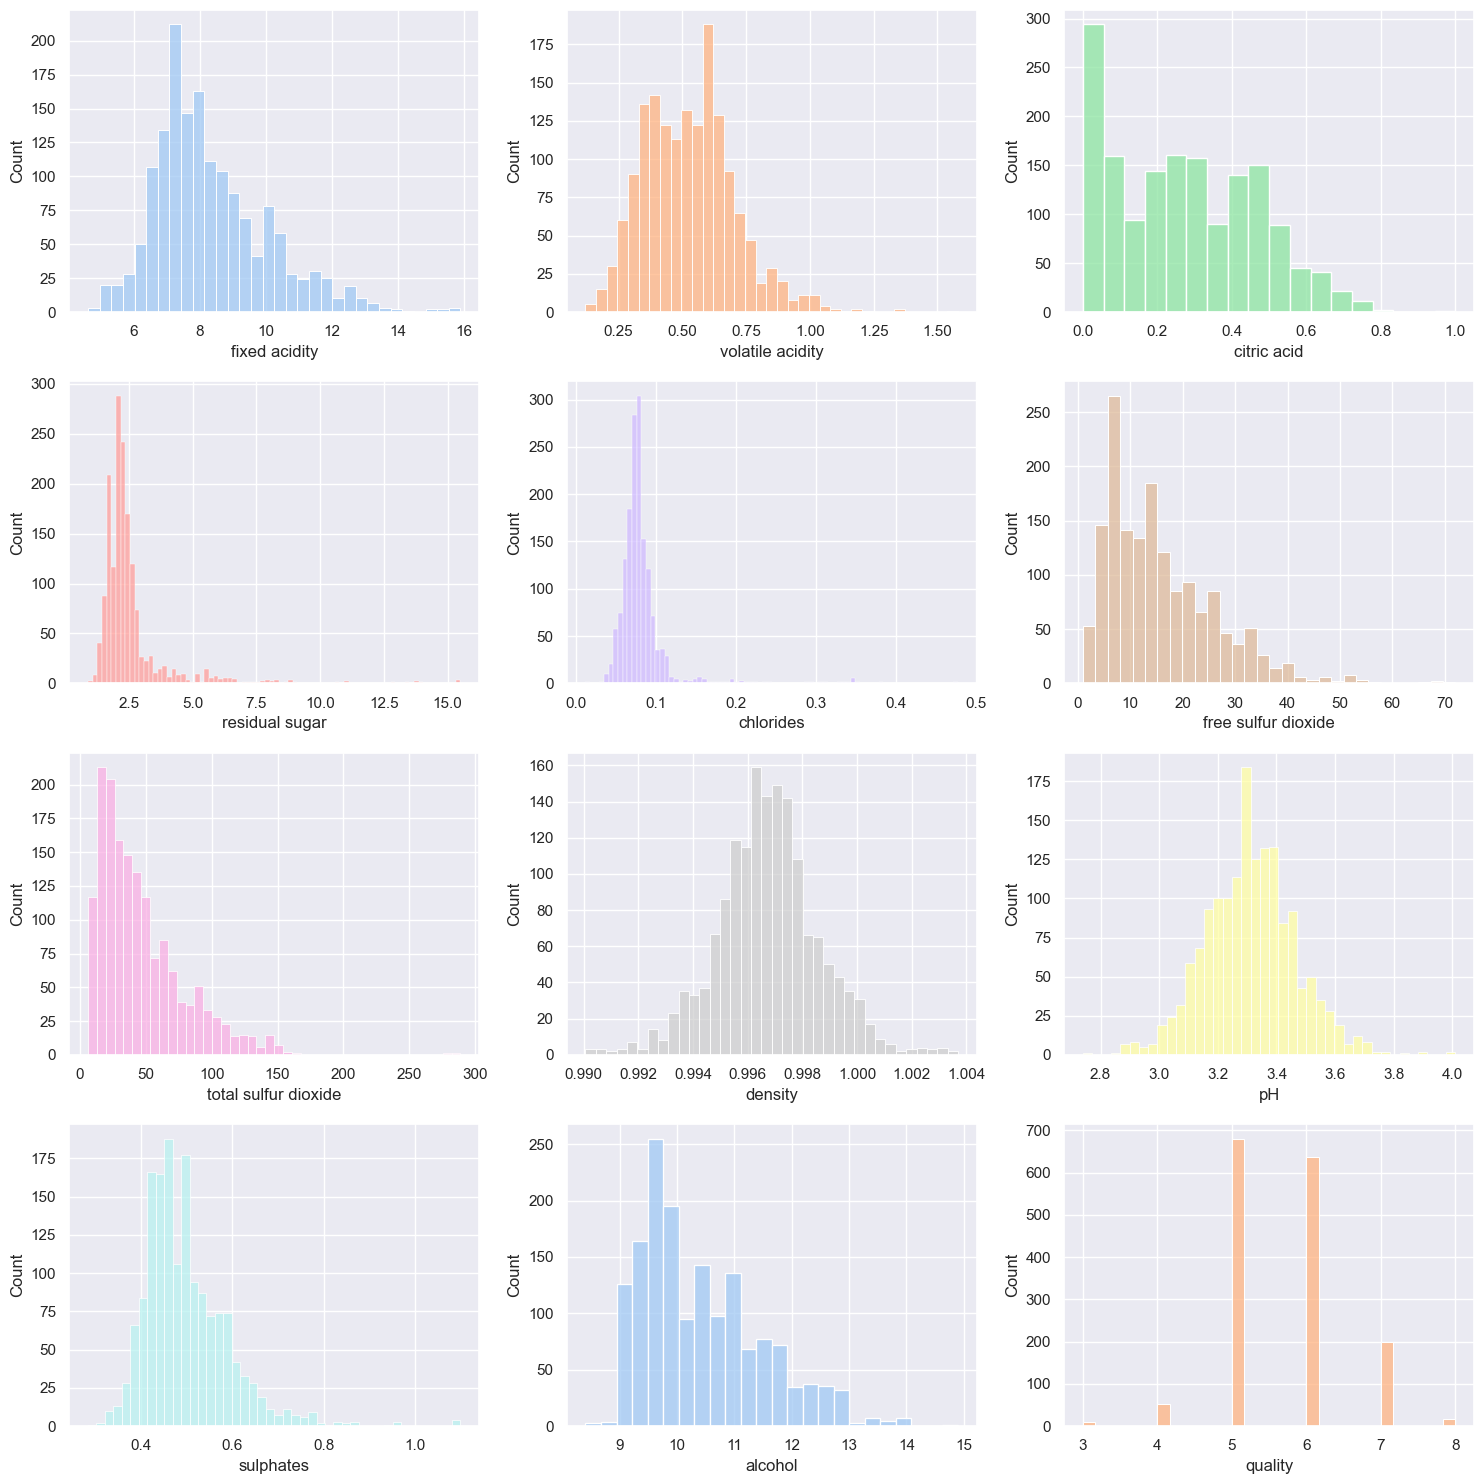

In [27]:
sns.set(style="darkgrid")
columns = list(wine_df.columns)
colors = sns.color_palette("pastel", len(columns))

fig, ax1 = plt.subplots(4,3, figsize=(15,15))
k = 0

for i in range(4):
    for j in range(3):
        if k < len(columns):
           sns.histplot(wine_df[columns[k]], ax=ax1[i][j], color=colors[k])
        k += 1

plt.tight_layout()
plt.show()

In [23]:
wine_df.corr().sort_values(by='quality' , ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual_sugar,free_sulfur_dioxide,total_sulfur_dioxide
quality,0.124052,-0.390558,0.226373,0.013732,-0.134818,-0.050656,-0.185100,-0.174919,-0.057731,0.280984,0.476166,1.000000,0.021687,-0.050344,-0.171419
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.231967,-0.069408,-0.205654,-0.496180,0.205633,0.114782,1.000000,0.476166,0.076381,-0.081808,-0.230553
sulphates,0.195163,-0.282193,0.324348,0.010539,0.338225,0.050146,0.027575,0.157096,-0.177952,1.000000,0.114782,0.280984,0.015572,0.055347,0.059263
citric acid,0.671703,-0.552496,1.000000,0.143577,0.201936,-0.060978,0.035533,0.364947,-0.541904,0.324348,0.109903,0.226373,0.168038,-0.087838,-0.002553
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.104151,-0.153794,-0.113181,0.668047,-0.682978,0.195163,-0.061668,0.124052,0.163362,-0.179551,-0.118225
residual_sugar,0.163362,0.020523,0.168038,0.955385,0.055852,0.158813,0.200919,0.405800,-0.091654,0.015572,0.076381,0.021687,1.000000,0.100081,0.153561
residual sugar,0.114777,0.001918,0.143577,1.000000,0.063853,0.187049,0.203028,0.355283,-0.085652,0.010539,0.042075,0.013732,0.955385,0.111922,0.149188
free_sulfur_dioxide,-0.179551,0.013142,-0.087838,0.111922,-0.005570,0.939330,0.678007,-0.039532,0.095520,0.055347,-0.081808,-0.050344,0.100081,1.000000,0.784256
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005350,1.000000,0.667666,-0.021946,0.070377,0.050146,-0.069408,-0.050656,0.158813,0.939330,0.714297
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.269238,0.070377,-0.066495,-0.341699,1.000000,-0.177952,0.205633,-0.057731,-0.091654,0.095520,-0.016021


In [39]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lm_rl = LogisticRegression()

accuracy_lr = classify(lm_rl, x, y)
print("LogisticRegression accuracy: {:<0.2f}".format(accuracy_lr))

LogisticRegression accuracy: 45.99


c:\Users\PAVAN RAYAPUREDDY\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#decision treee classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
accuracy_dtc = classify(model, x, y)
print("DecisionTreeClassifier accuracy: {:<0.2f}". format(accuracy_dtc))

DecisionTreeClassifier accuracy: 76.39


In [44]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
accuracy_rfc = classify(model, x, y)
print("RandomForestClassifier accuracy: {:<0.2f}". format(accuracy_rfc))

RandomForestClassifier accuracy: 84.65


C:\Users\PAVAN RAYAPUREDDY\AppData\Local\Temp\ipykernel_25504\2138466284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='pastel')


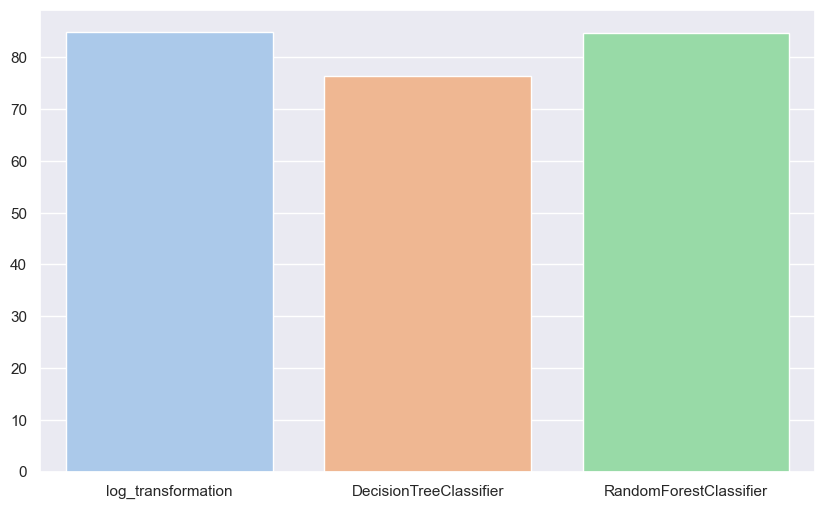

In [45]:
#ploting the accuraciesof different models
models = ['log_transformation' , 'DecisionTreeClassifier' , 'RandomForestClassifier']
accuracies = [accuracy_lr , accuracy_dtc , accuracy_rfc]
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies, palette='pastel')
plt.show()

In [12]:
#predict the quality of wine
#inserting the new data

model=RandomForestClassifier()
model.fit(x,y)

sample_data=(7.4,0.7,1.9,0.076,11,34,0.09978,3.51,0.56,9.4)
sample_data=np.array(sample_data).reshape(1,-1)

In [ ]:
# Predict the quality of wine
# Inserting the new data

model = RandomForestClassifier( random_state=42)
model.fit(x, y)

sample_data = (7.9,
               0.35,
               0.46,
               3.6,
               0.078,
               15,
               37,
               0.9973,
               3.35,
               0.86,
               12.8)
sample_data = np.array(sample_data).reshape(1, -1)
prediction = model.predict(sample_data)
print("Predicted wine quality:", prediction[0])

In [10]:

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42)
model.fit(x, y)


sample_values = [7.4, 0.7, 0.0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]


if len(sample_values) != len(x.columns):
    print("Error: number of sample values does not match number of features.")
    print("Expected features:", list(x.columns))
else:
    sample_df = pd.DataFrame([sample_values], columns=x.columns)


    prediction = model.predict(sample_df)
    proba = model.predict_proba(sample_df) if hasattr(model, "predict_proba") else None

    print("Predicted quality of wine:", int(prediction[0]))
    if proba is not None:
        print("Prediction probabilities:")
        print(dict(zip(model.classes_, np.round(proba[0], 3))))

Predicted quality of wine: 5
Prediction probabilities:
{np.int64(3): np.float64(0.0), np.int64(4): np.float64(0.01), np.int64(5): np.float64(0.98), np.int64(6): np.float64(0.01), np.int64(7): np.float64(0.0), np.int64(8): np.float64(0.0)}


In [11]:
import pickle
with open('wine_quality_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("Model saved to wine_quality_model.pkl successfully.")

Model saved to wine_quality_model.pkl successfully.
